## Logistic

In [6]:
### packages
library(ggplot2)
library(ggpubr)
library(tidyverse)
library(broom)
library(AICcmodavg)
library('caret')
library('rpart')
library(rpart.plot)
library(readr)
library('Amelia')

Loading required package: Rcpp

## 
## Amelia II: Multiple Imputation
## (Version 1.8.1, built: 2022-11-18)
## Copyright (C) 2005-2022 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 



In [4]:
### Read data
df = read.csv('data/mushroom.csv', row.names = 'X')
head(df)

,Class,cap.shape,cap.surface,cap.color,bruises,odor,gill.attachment,gill.spacing,gill.size,gill.color,⋯,stalk.surface.below.ring,stalk.color.above.ring,stalk.color.below.ring,veil.type,veil.color,ring.number,ring.type,print,population,habitat
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Poisonous,x,s,n,t,None,f,c,n,k,⋯,s,w,w,p,w,o,p,Buff,s,u
2,Edible,x,s,y,t,Almonds,f,c,b,k,⋯,s,w,w,p,w,o,p,Chocolate,n,g
3,Edible,b,s,w,t,Fishy,f,c,b,n,⋯,s,w,w,p,w,o,p,Chocolate,n,m
4,Poisonous,x,y,w,t,None,f,c,n,n,⋯,s,w,w,p,w,o,p,Buff,s,u
5,Edible,x,s,g,f,Musty,f,w,b,k,⋯,s,w,w,p,w,o,e,Chocolate,a,g
6,Edible,x,y,y,t,Almonds,f,c,b,n,⋯,s,w,w,p,w,o,p,Buff,n,g


In [5]:
tail(df)
print(summary(df))

,Class,cap.shape,cap.surface,cap.color,bruises,odor,gill.attachment,gill.spacing,gill.size,gill.color,⋯,stalk.surface.below.ring,stalk.color.above.ring,stalk.color.below.ring,veil.type,veil.color,ring.number,ring.type,print,population,habitat
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
8119,Poisonous,k,y,n,f,Creosote,f,c,n,b,⋯,s,p,w,p,w,o,e,White,v,d
8120,Edible,k,s,n,f,Musty,a,c,b,y,⋯,s,o,o,p,o,o,p,Black,c,l
8121,Edible,x,s,n,f,Musty,a,c,b,y,⋯,s,o,o,p,n,o,p,Black,v,l
8122,Edible,f,s,n,f,Musty,a,c,b,n,⋯,s,o,o,p,o,o,p,Black,c,l
8123,Poisonous,k,y,n,f,Spicy,f,c,n,b,⋯,k,w,w,p,w,o,e,White,v,l
8124,Edible,x,s,n,f,Musty,a,c,b,y,⋯,s,o,o,p,o,o,p,Green,c,l


    Class            cap.shape         cap.surface         cap.color        
 Length:8124        Length:8124        Length:8124        Length:8124       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
   bruises              odor           gill.attachment    gill.spacing      
 Length:8124        Length:8124        Length:8124        Length:8124       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
  gill.size          gill.color        stalk.shape         stalk.root       
 Length:8124        Length:8124        Length:8124        Length:8124       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
 stalk.surface.above.ring stalk.surface.below.ring stalk.color.above.ring
 L

In [5]:
### We check and exlcude features with single class
df_miss = matrix(ncol= 2, nrow = 0)
colnames(df_miss) = c('Colname', 'Length of Unique value')
for (i in colnames(df)){
    len = length(unique(df[,i]))
    df_miss = rbind(df_miss, c(i,len))
}
df1 = data.frame(df_miss)
df1

Colname,Length.of.Unique.value
<chr>,<chr>
Class,2
cap.shape,6
cap.surface,4
cap.color,10
bruises,2
odor,9
gill.attachment,2
gill.spacing,2
gill.size,2


In [8]:
# Removing variable with single value
df$veil.type = NULL
names(df)

[1] "Class"                    "cap.shape"               
 [3] "cap.surface"              "cap.color"               
 [5] "bruises"                  "odor"                    
 [7] "gill.attachment"          "gill.spacing"            
 [9] "gill.size"                "gill.color"              
[11] "stalk.shape"              "stalk.root"              
[13] "stalk.surface.above.ring" "stalk.surface.below.ring"
[15] "stalk.color.above.ring"   "stalk.color.below.ring"  
[17] "veil.color"               "ring.number"             
[19] "ring.type"                "print"                   
[21] "population"               "habitat"

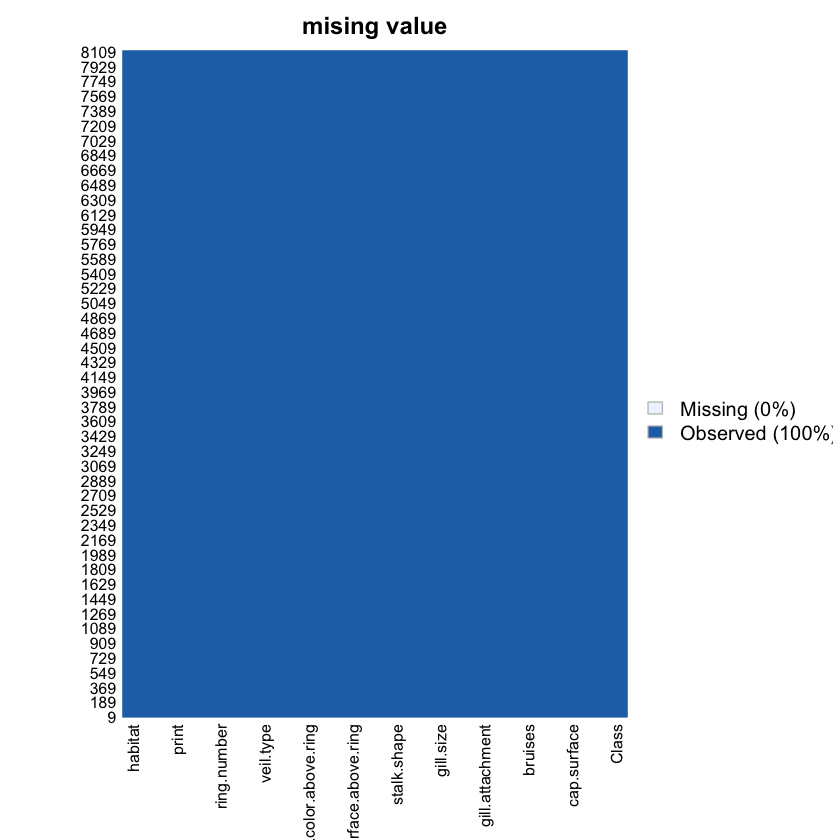

In [7]:
### Visualize missing value
missmap(df, main = 'mising value')

In [9]:
### sample of each class
print(table(df$Class))


   Edible Poisonous 
     4208      3916 


In [10]:
### convert y value: 1 normal, low: 0
df$Class <- ifelse(df$Class=='Edible',0,1)

In [11]:
print(table(df$Class))


   0    1 
4208 3916 


In [12]:
## divide the dataset into Train and Test set 
set.seed(42)
trainingrowindex = sample(1:nrow(df), size = round(0.8*nrow(df)), replace=FALSE)
#print('selected training row indexes: ')
#print(trainingrowindex)
traindata = df[trainingrowindex,]
testdata = df[-trainingrowindex,]
print(nrow(traindata))
print(nrow(testdata))

[1] 6499
[1] 1625


### Logistic regression

In [14]:
mylogit <- glm(Class ~., data = traindata, family = 'binomial')
print(summary(mylogit))

Warning message:
“glm.fit: algorithm did not converge”



Call:
glm(formula = Class ~ ., family = "binomial", data = traindata)

Deviance Residuals: 
       Min          1Q      Median          3Q         Max  
-2.409e-06  -2.409e-06  -2.409e-06   2.409e-06   2.409e-06  

Coefficients: (10 not defined because of singularities)
                            Estimate Std. Error z value Pr(>|z|)
(Intercept)               -2.657e+01  3.491e+05       0        1
cap.shapec                 2.085e-06  2.175e+05       0        1
cap.shapef                 6.310e-09  2.632e+04       0        1
cap.shapek                -2.090e-08  2.859e+04       0        1
cap.shapes                 5.404e-09  9.292e+04       0        1
cap.shapex                 5.428e-09  2.526e+04       0        1
cap.surfaceg              -2.405e-07  2.521e+05       0        1
cap.surfaces              -5.902e-10  1.500e+04       0        1
cap.surfacey               1.259e-11  1.264e+04       0        1
cap.colorc                -1.294e-09  8.735e+04       0        1
cap.colore   

In [15]:
pred = predict(mylogit, newdata=testdata,
              type = 'response')
pred_value = ifelse(pred >0.5,1,0)
print('test data Class vs predict (5 rows: )')
result = data.frame(testClass = testdata$Class, pred_value)
print(head(result))

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”


[1] "test data Class vs predict (5 rows: )"
   testClass pred_value
5          0          0
6          0          0
12         0          0
13         0          0
17         0          0
20         1          1


In [16]:
confusionMatrix(as.factor(pred_value), as.factor(testdata$Class))

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 861   0
         1   0 764
                                     
               Accuracy : 1          
                 95% CI : (0.9977, 1)
    No Information Rate : 0.5298     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0000     
            Specificity : 1.0000     
         Pos Pred Value : 1.0000     
         Neg Pred Value : 1.0000     
             Prevalence : 0.5298     
         Detection Rate : 0.5298     
   Detection Prevalence : 0.5298     
      Balanced Accuracy : 1.0000     
                                     
       'Positive' Class : 0          
                                     

## Decision Tree

In [17]:
classifier_dt = rpart(Class ~.,
                      data = traindata)
print(summary(classifier_dt))

Call:
rpart(formula = Class ~ ., data = traindata)
  n= 6499 

          CP nsplit  rel error     xerror         xstd
1 0.94250970      0 1.00000000 1.00033622 0.0007522006
2 0.03193752      1 0.05749030 0.05754671 0.0056643666
3 0.01148069      2 0.02555277 0.02556428 0.0038827003
4 0.01000000      3 0.01407208 0.01891168 0.0033645972

Variable importance
                    odor                    print               gill.color 
                      25                       19                       16 
stalk.surface.below.ring stalk.surface.above.ring                ring.type 
                      13                       13                       13 

Node number 1: 6499 observations,    complexity param=0.9425097
  mean=0.4849977, MSE=0.2497749 
  left son=2 (3443 obs) right son=3 (3056 obs)
  Primary splits:
      odor                     splits as  LRRLRLRRR,    improve=0.9425097, (0 missing)
      print                    splits as  LRLLLRLRL,    improve=0.5314946, (0 missing)


In [18]:
pred1 = predict(classifier_dt, newdata=testdata)
pred_value1 = ifelse(pred1 >0.5,1,0)
print('test data Class vs predict (5 rows: )')
result1 = data.frame(testClass = testdata$Class, pred_value1)
print(head(result1))

[1] "test data Class vs predict (5 rows: )"
   testClass pred_value1
5          0           0
6          0           0
12         0           0
13         0           0
17         0           0
20         1           1


In [19]:
confusionMatrix(as.factor(pred_value1), as.factor(testdata$Class))

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 861   1
         1   0 763
                                     
               Accuracy : 0.9994     
                 95% CI : (0.9966, 1)
    No Information Rate : 0.5298     
    P-Value [Acc > NIR] : <2e-16     
                                     
                  Kappa : 0.9988     
                                     
 Mcnemar's Test P-Value : 1          
                                     
            Sensitivity : 1.0000     
            Specificity : 0.9987     
         Pos Pred Value : 0.9988     
         Neg Pred Value : 1.0000     
             Prevalence : 0.5298     
         Detection Rate : 0.5298     
   Detection Prevalence : 0.5305     
      Balanced Accuracy : 0.9993     
                                     
       'Positive' Class : 0          
                                     